In [1]:
import keras,pandas as pd,os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD,Adamax,RMSprop,Adam,Nadam

In [2]:

S_1=pd.read_csv('Siover1_rf_top10_cgmh_data.csv')


data_shape = S_1.shape


Siov1_x=S_1.iloc[:,1:data_shape[1]]
Siov1_y=S_1['si1m']

print(Siov1_x.shape[1])
print(Siov1_y.shape)
print(Siov1_x.shape)

10
(4314,)
(4314, 10)


In [3]:

from sklearn.model_selection import train_test_split
from utils.dataloader import normalized


In [4]:
Siov1_x.shape

(4314, 10)

In [5]:
S_3_test=pd.read_csv('Siover1_rf_top10_cgmh_data_test.csv')
S_3_train=pd.read_csv('Siover1_rf_top10_cgmh_data_train.csv')


In [8]:
S_3_test.shape


(3237, 11)

In [9]:
S_3_train.shape

(1077, 11)

In [10]:
test_x = S_3_test.iloc[:,1:data_shape[0]]
test_x.shape

(3237, 10)

In [11]:
train_x = S_3_train.iloc[:,1:data_shape[0]]
train_x.shape

(1077, 10)

In [12]:
test_y=S_3_test['si1m']
train_y=S_3_train['si1m']

In [13]:
test_y

0       1
1       1
2       1
3       1
4       1
       ..
3232    0
3233    0
3234    0
3235    0
3236    0
Name: si1m, Length: 3237, dtype: int64

In [14]:

print(train_y.shape)
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)
print(sum(test_y))

(1077,)
(1077, 10)
(3237,)
(3237, 10)
183


In [15]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [17]:
from utils.model import best_model


Epoch 1/300
10/10 [==============================] - 0s 14ms/step - loss: 0.5250 - accuracy: 0.8906 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.9381 - val_loss: 0.2951 - val_accuracy: 1.0000
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.9381 - val_loss: 0.1952 - val_accuracy: 1.0000
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.9381 - val_loss: 0.1159 - val_accuracy: 1.0000
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9381 - val_loss: 0.0995 - val_accuracy: 1.0000
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9381 - val_loss: 0.0953 - val_accuracy: 1.0000
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9381 - val_loss: 0.0959 - val_accuracy: 1.0000
Epoch 8/300


Epoch 116/300
10/10 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9381 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 117/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9381 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 118/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9381 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoch 119/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9381 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 120/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9381 - val_loss: 0.0467 - val_accuracy: 1.0000
Epoch 121/300
10/10 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9381 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 00121: early stopping


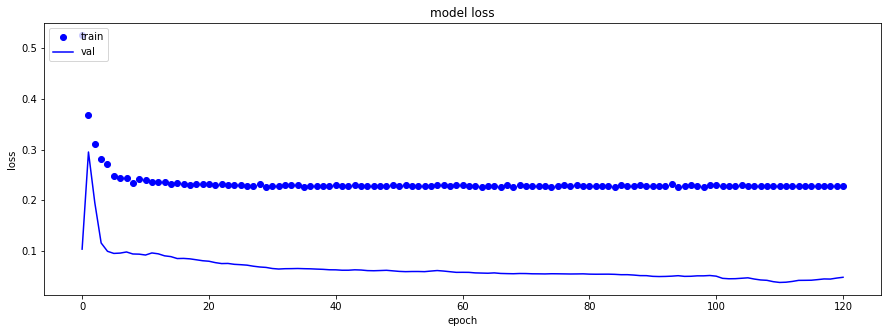

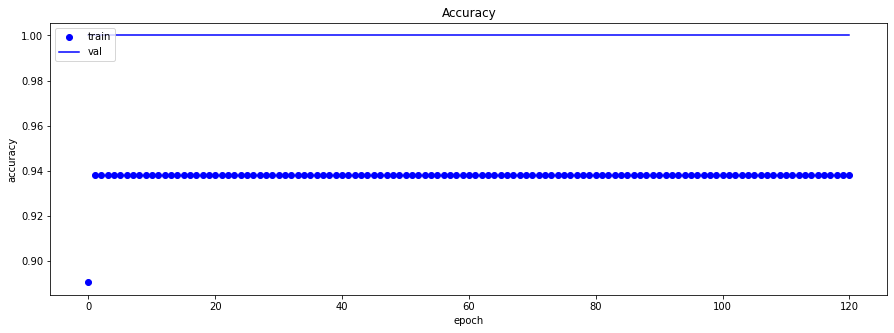

In [21]:
model_best = best_model(train_x, test_x, train_y, test_y,input_shape=10, 
                        batch=100,epoch=300,lr=0.1,decay=0.001,momentum=0.8,af='relu',
                        units_L=1,dropout=0.8 ,units_num=5,warm_up=0)


In [22]:
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)

In [23]:
_,accuracy_tr = model_best.evaluate(train_x, train_y,verbose=0)
_,accuracy_te = model_best.evaluate(test_x, test_y,verbose=0)

In [24]:
accuracy_tr

0.9442896842956543

In [25]:
accuracy_te

0.9434661865234375

In [26]:
auc_tr=roc_auc_score(train_y, yhat_probs_train)
auc_te=roc_auc_score(test_y, yhat_probs_test)


In [27]:

yhat_probs_test = model_best.predict(test_x, verbose=0)

In [28]:
auc_tr

0.7997132087840052

In [29]:
auc_te

0.8250417798390357

In [31]:
r0=pd.DataFrame([accuracy_tr, accuracy_te,auc_tr,auc_te])



(3237, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
=== Accuracy ===
Accuracy (train): 0.944290
Accuracy (test): 0.943466


=== Precision ===
Precision (train): 0.000000
Precision (test): 0.000000


=== Recall ===
Recall (train): 0.000000
Recall (test): 0.000000


=== F1 score ===
F1 score (train): 0.000000
F1 score (test): 0.000000


=== Cohens Kappa ===
Cohens kappa (train): 0.000000
Cohens kappa (test): 0.000000


=== ROC AUC ===
ROC AUC for training dataset: 0.799713
ROC AUC for testing dataset: 0.825042


=== Confusion matrix for train datset ===
[[1017    0]
 [  60    0]]


=== Confusion matrix for test datset ===
[[3054    0]
 [ 183    0]]


C:\Users\PEK\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


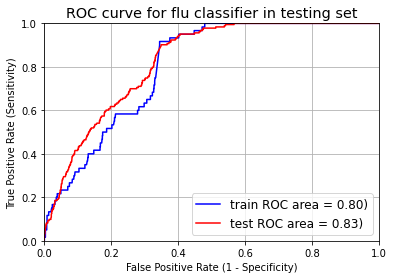

In [32]:
from utils.visualize import visualize
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)
print(yhat_probs_test.shape)
yhat_classes_train,yhat_classes_test=visualize(yhat_probs_train,yhat_probs_test,model_best,train_x,train_y,test_x,test_y)

In [34]:
df1 = r0.T

In [35]:
df1.columns = ['Train accuracy', 'valid accuracy','Train AUC' ,'Valid AUC' ]

In [36]:
df1

,Train accuracy,valid accuracy,Train AUC,Valid AUC
0,0.94429,0.943466,0.799713,0.825042


In [38]:
import numpy as np

In [39]:
predict_train=model_best.predict(train_x) 
classes_train_pred=np.argmax(predict_train,axis=1)
classes_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
predict_test=model_best.predict(test_x) 
classes_test_pred=np.argmax(predict_test,axis=1)
classes_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
train_y = pd.DataFrame(train_y)
classes_train_pred = pd.DataFrame(classes_train_pred)
yhat_probs_train = pd.DataFrame(yhat_probs_train)

In [42]:
train_result= pd.concat([train_y, classes_train_pred,yhat_probs_train], axis=1)
train_result

,si1m,0,0
0,1,0,0.066216
1,1,0,0.047315
2,1,0,0.066222
3,1,0,0.066210
4,1,0,0.066228
...,...,...,...
1072,0,0,0.066188
1073,0,0,0.066207
1074,0,0,0.054820
1075,0,0,0.013856


In [43]:
train_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [44]:
train_result.to_csv('dnn for si over 1 in cgmh train result ver1 20230223.csv')

In [45]:
test_y = pd.DataFrame(test_y)
classes_test_pred = pd.DataFrame(classes_test_pred)
yhat_probs_test = pd.DataFrame(yhat_probs_test)

In [46]:
test_result= pd.concat([classes_test_pred, classes_test_pred,yhat_probs_test], axis=1)
test_result

,0,0,0
0,0,0,0.066195
1,0,0,0.066188
2,0,0,0.066184
3,0,0,0.066189
4,0,0,0.066203
...,...,...,...
3232,0,0,0.066209
3233,0,0,0.066212
3234,0,0,0.066212
3235,0,0,0.066195


In [47]:
test_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [48]:
test_result.to_csv('dnn for si over 1 in cgmh test result ver1 20230223.csv')